In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.python.data.experimental import cardinality
from plot import show_examples

In [3]:
(mnist_train, mnist_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [4]:
print("train samples:", cardinality(mnist_train).numpy())
print("test samples:", cardinality(mnist_test).numpy())

train samples: 60000
test samples: 10000


In [5]:
def normalize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    return tf.cast(image, tf.float32) / 255., label

In [6]:
shuffle = ds_info.splits['train'].num_examples

mnist_train_normalized = mnist_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
mnist_train_normalized = mnist_train_normalized.cache()
mnist_train_normalized = mnist_train_normalized.shuffle(shuffle)
mnist_train_normalized = mnist_train_normalized.batch(128)
mnist_train_normalized = mnist_train_normalized.prefetch(tf.data.AUTOTUNE)

In [7]:
mnist_test_normalized = mnist_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
mnist_test_normalized = mnist_test_normalized.batch(128)
mnist_test_normalized = mnist_test_normalized.cache()
mnist_test_normalized = mnist_test_normalized.prefetch(tf.data.AUTOTUNE)

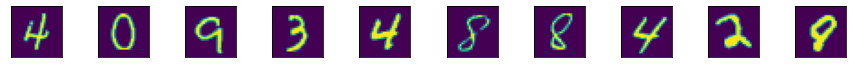

In [9]:
show_examples(mnist_train_normalized.take(10), rows=10, cols=10, plot_scale=1.5)

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax, name="prediction")
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    mnist_train_normalized,
    epochs=6,
    validation_data=mnist_test_normalized,
)

469/469 [==============================] - 1s 2ms/step - loss: 1.6746 - sparse_categorical_accuracy: 0.8079 - val_loss: 1.6180 - val_sparse_categorical_accuracy: 0.8499
Epoch 2/6
469/469 [==============================] - 1s 3ms/step - loss: 1.6116 - sparse_categorical_accuracy: 0.8548 - val_loss: 1.6032 - val_sparse_categorical_accuracy: 0.8619

Epoch 1/6
469/469 [==============================] - 1s 2ms/step - loss: 1.6831 - sparse_categorical_accuracy: 0.7984 - val_loss: 1.6172 - val_sparse_categorical_accuracy: 0.8505

In [25]:
prediction = model.predict(mnist_test_normalized)
prediction

array([[1.7245569e-10, 4.5247865e-16, 9.9999988e-01, ..., 1.6059755e-16,
        3.4880657e-08, 5.2874302e-12],
       [1.0000000e+00, 1.8077593e-20, 4.1208936e-13, ..., 2.6280689e-19,
        4.2679393e-09, 4.8233196e-17],
       [1.7857974e-15, 3.0102812e-20, 7.0819361e-14, ..., 1.1339677e-07,
        1.6665837e-10, 1.4492581e-05],
       ...,
       [7.2178266e-13, 1.0680416e-14, 5.2898479e-13, ..., 1.1514527e-17,
        8.1615461e-08, 1.9278962e-11],
       [1.0000000e+00, 7.8411690e-21, 9.8949582e-10, ..., 9.6808184e-13,
        2.2110848e-12, 4.5347214e-13],
       [1.2518544e-07, 9.2471749e-01, 5.6825900e-07, ..., 4.6597677e-05,
        7.4836858e-02, 3.5478748e-04]], dtype=float32)

In [19]:
for images, labels in mnist_test_normalized.take(1):  # only take first element of dataset
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()

In [21]:
numpy_labels

array([2, 0, 4, 8, 7, 6, 0, 6, 3, 1, 8, 0, 7, 9, 4, 5, 8, 4, 3, 6, 6, 3,
       3, 0, 2, 6, 6, 7, 0, 9, 8, 4, 4, 3, 2, 7, 5, 5, 8, 5, 2, 9, 2, 5,
       4, 2, 7, 1, 5, 7, 9, 9, 0, 9, 6, 5, 8, 6, 5, 4, 0, 6, 2, 8, 9, 1,
       8, 9, 0, 9, 5, 5, 4, 1, 5, 2, 0, 6, 6, 2, 8, 4, 9, 7, 8, 3, 0, 7,
       1, 9, 1, 4, 9, 5, 4, 6, 6, 6, 7, 9, 0, 8, 0, 7, 8, 1, 7, 2, 9, 8,
       1, 0, 7, 4, 3, 9, 0, 8, 4, 9, 8, 6, 0, 9, 3, 4, 3, 5])

In [20]:
from reporting.evaluation import confusion_matrix
